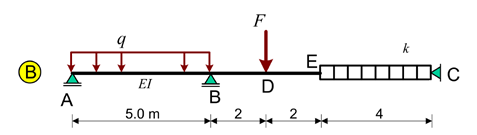

In [1]:
import sympy as sp
w1, w2, w3, w4 = sp.symbols('w1 w2 w3 w4', cls=sp.Function)
C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8 C9 C10 C11 C12 C13 C14 C15')
x = sp.symbols('x')
#q, EI, k, F = sp.symbols('q EI k F')
phi4 = sp.symbols('phi4')

k = 1000
EI = 1500
q = 8
F = 25

diffeq1 = sp.Eq(EI*w1(x).diff(x,4),q)
diffeq2 = sp.Eq(EI*w2(x).diff(x,4),0)
diffeq3 = sp.Eq(EI*w3(x).diff(x,4),0)
diffeq4 = sp.Eq( k*w4(x).diff(x,2),0)

w1,w2,w3,w4 = sp.dsolve([diffeq1,diffeq2,diffeq3,diffeq4],[w1(x),w2(x),w3(x),w4(x)])
w1 = w1.rhs
w2 = w2.rhs
w3 = w3.rhs
w4 = w4.rhs

phi1   = -sp.diff(w1 , x)
kappa1 =  sp.diff(phi1 , x)
M1     = EI * kappa1
V1     =  sp.diff(M1 , x)

phi2   = -sp.diff(w2 , x)
kappa2 =  sp.diff(phi2 , x)
M2     = EI * kappa2
V2     =  sp.diff(M2 , x)

phi3   = -sp.diff(w3 , x)
kappa3 =  sp.diff(phi3 , x)
M3     = EI * kappa3
V3     =  sp.diff(M3 , x)

gamma4 =  sp.diff(w4 , x) + phi4
V4     = k * gamma4
M4     =  sp.integrate(V4,x) + C15

eq1  = sp.Eq(  w1.subs(x , 0) , 0)
eq2  = sp.Eq(  M1.subs(x , 0) , 0)

eq3  = sp.Eq(  w1.subs(x , 5) , 0               )
eq4  = sp.Eq(  w2.subs(x , 5) , 0               )
eq5  = sp.Eq(  M1.subs(x , 5) , M2.subs(x , 5)  )
eq6  = sp.Eq(phi1.subs(x , 5) , phi2.subs(x , 5))

eq7  = sp.Eq(  w2.subs(x , 7) , w3.subs(x , 7)    )
eq8  = sp.Eq(phi2.subs(x , 7) , phi3.subs(x , 7)  )
eq9  = sp.Eq(  V2.subs(x , 7) , F + V3.subs(x , 7))
eq10 = sp.Eq(  M2.subs(x , 7) , M3.subs(x , 7)    )

eq11 = sp.Eq(  w3.subs(x , 9) , w4.subs(x , 9))
eq12 = sp.Eq(phi3.subs(x , 9) , phi4          )
eq13 = sp.Eq(  V3.subs(x , 9) , V4.subs(x , 9))
eq14 = sp.Eq(  M3.subs(x , 9) , M4.subs(x , 9))

eq15 = sp.Eq(w4.subs(x , 13) , 0)
eq16 = sp.Eq(M4.subs(x , 13) , 0)

sol = sp.solve((eq1 , eq2 , eq3 , eq4 , eq5 , eq6 , eq7 , eq8 , eq9 , eq10 , eq11 , eq12 , eq13 , eq14 , eq15 , eq16) ,
               (C1  , C2  , C3  , C4  , C5  , C6  , C7  , C8  , C9  ,  C10 , C11  , C12  , C13  , C14  , C15  , phi4))
w1_sol = w1.subs(sol)
w2_sol = w2.subs(sol)
w3_sol = w3.subs(sol)
w4_sol = w4.subs(sol)
display(w1_sol,w2_sol,w3_sol,w4_sol)

x**4/4500 - 187*x**3/117900 + 14*x/1179

-13*x**3/5240 + 49*x**2/1048 - 2617*x/9432 + 4985/9432

7*x**3/23580 - 91*x**2/7860 + 1543*x/11790 - 2501/5895

247/2358 - 19*x/2358

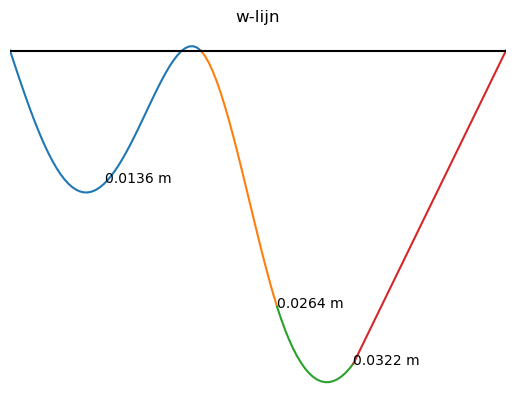

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x1_plot = np.linspace(0 , 5  , 50)
x2_plot = np.linspace(5 , 7  , 20)
x3_plot = np.linspace(7 , 9  , 20)
x4_plot = np.linspace(9 , 13 , 40)
w1_numpy = sp.lambdify(x , w1_sol)
w2_numpy = sp.lambdify(x , w2_sol)
w3_numpy = sp.lambdify(x , w3_sol)
w4_numpy = sp.lambdify(x , w4_sol)
w1_plot = w1_numpy(x1_plot)
w2_plot = w2_numpy(x2_plot)
w3_plot = w3_numpy(x3_plot)
w4_plot = w4_numpy(x4_plot)
plt.plot(x1_plot,w1_plot)
plt.plot(x2_plot,w2_plot)
plt.plot(x3_plot,w3_plot)
plt.plot(x4_plot,w4_plot)
plt.gca().invert_yaxis()
plt.title("w-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 13)
plt.annotate('%.4f m' % w1_numpy(2.5) , xy = [2.5 , w1_numpy(2.5)])
plt.annotate('%.4f m' % w2_numpy(7) , xy = [7 , w2_numpy(7)])
plt.annotate('%.4f m' % w3_numpy(9) , xy = [9 , w3_numpy(9)])
plt.axis('off');

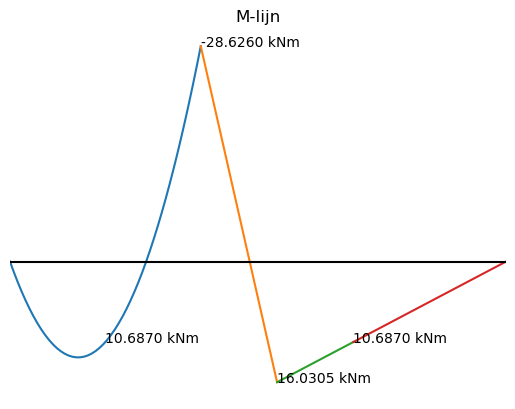

In [3]:
M1_sol = M1.subs(sol)
M2_sol = M2.subs(sol)
M3_sol = M3.subs(sol)
M4_sol = M4.subs(sol)
M1_numpy = sp.lambdify(x , M1_sol)
M2_numpy = sp.lambdify(x , M2_sol)
M3_numpy = sp.lambdify(x , M3_sol)
M4_numpy = sp.lambdify(x , M4_sol)
M1_plot = M1_numpy(x1_plot)
M2_plot = M2_numpy(x2_plot)
M3_plot = M3_numpy(x3_plot)
M4_plot = M4_numpy(x4_plot)
plt.figure()
plt.plot(x1_plot,M1_plot)
plt.plot(x2_plot,M2_plot)
plt.plot(x3_plot,M3_plot)
plt.plot(x4_plot,M4_plot)
plt.gca().invert_yaxis()
plt.title("M-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 13)
plt.annotate('%.4f kNm' % M1_numpy(2.5) , xy = [2.5 , M1_numpy(2.5)])
plt.annotate('%.4f kNm' % M1_numpy(5) , xy = [5 , M1_numpy(5)])
plt.annotate('%.4f kNm' % M2_numpy(7) , xy = [7 , M2_numpy(7)])
plt.annotate('%.4f kNm' % M3_numpy(9) , xy = [9 , M3_numpy(9)])
plt.axis('off');

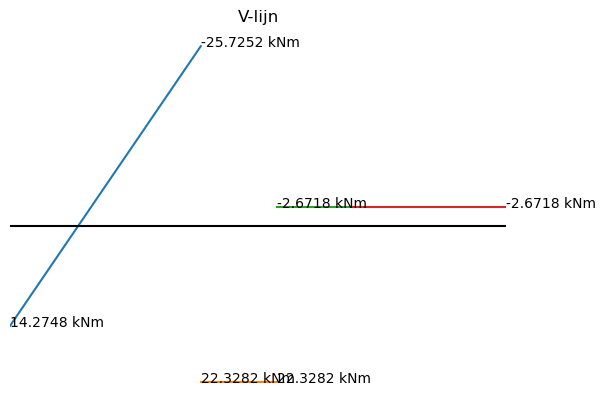

In [4]:
V1_sol = V1.subs(sol)
V2_sol = V2.subs(sol)
V3_sol = V3.subs(sol)
V4_sol = V4.subs(sol)
V1_numpy = sp.lambdify(x , V1_sol)
V2_numpy = sp.lambdify(x , V2_sol)
V3_numpy = sp.lambdify(x , V3_sol)
V4_numpy = sp.lambdify(x , V4_sol)
V1_plot = V1_numpy(x1_plot)
V2_plot = V2_numpy(x2_plot)
V3_plot = V3_numpy(x3_plot)
V4_plot = V4_numpy(x4_plot)
plt.figure()
plt.plot(x1_plot,V1_plot)
plt.plot([5,7]  , [V2_plot,V2_plot])
plt.plot([7,9]  , [V3_plot,V3_plot])
plt.plot([9,13] , [V4_plot,V4_plot])
plt.gca().invert_yaxis()
plt.title("V-lijn")
plt.axhline(0 , color='black')
plt.xlim(0 , 13)
plt.annotate('%.4f kNm' % V1_numpy(0) , xy = [0 , V1_numpy(0)])
plt.annotate('%.4f kNm' % V1_numpy(5) , xy = [5 , V1_numpy(5)])
plt.annotate('%.4f kNm' % V2_numpy(5) , xy = [5 , V2_numpy(5)])
plt.annotate('%.4f kNm' % V2_numpy(7) , xy = [7 , V2_numpy(7)])
plt.annotate('%.4f kNm' % V3_numpy(7) , xy = [7 , V3_numpy(7)])
plt.annotate('%.4f kNm' % V4_numpy(13) , xy = [13 , V3_numpy(13)])
plt.axis('off');